In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
#shape of each image matrix
X_train[0].shape

(28, 28)

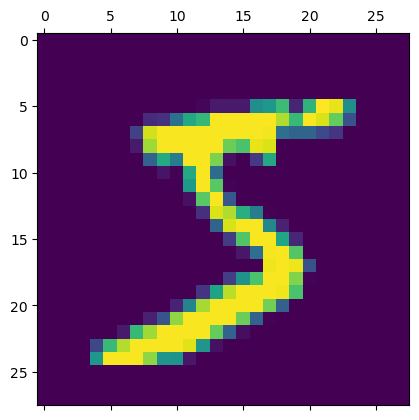

In [6]:
plt.matshow(X_train[0])

In [7]:
#Flatten the 28*28 matrix into sq(28)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flattened.shape

(60000, 784)

In [9]:
X_train_flattened[0].shape #flattened the matrix into a single column with 28*28 rows

(784,)

In [10]:
"""Since the numbers are between 0 to 9, the number of input layers in the neural network will be 784 and 
number of output layers will be 10
Using sequential stack of layers, therefore using Keras Sequential"""

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation= 'sigmoid') #Dense- each neuron is connected to every other neuron in other layer
]
)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Metal device set to: Apple M1


In [11]:
model.fit(X_train_flattened, y_train, epochs= 5)

Epoch 1/5


2023-04-22 15:31:30.857415: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 7s 4ms/step - loss: 10.1077 - accuracy: 0.8389
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.0303 - accuracy: 0.8787
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.8063 - accuracy: 0.8840
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4187 - accuracy: 0.8869
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4551 - accuracy: 0.8870


In [12]:
"""Trying to scale the data to get better accuracy
Since the values in the individual matrixes range between 0(black)-255(white)
So dividing the values by 255 will give us values between 0 to 1"""
X_scaled_train = X_train/255

X_scaled_test = X_test/255

In [13]:
X_flat_scaled_train = X_scaled_train.reshape(len(X_scaled_train), 28*28)
X_flat_scaled_test = X_scaled_test.reshape(len(X_scaled_test), 28*28)

In [14]:
model.fit(X_flat_scaled_train, y_train, epochs= 6)

Epoch 1/6
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3003 - accuracy: 0.8266
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8946 - accuracy: 0.8721
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6162 - accuracy: 0.8853
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4509 - accuracy: 0.8970
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3599 - accuracy: 0.9065
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3113 - accuracy: 0.9142


In [15]:
#Evaluating the accuracy on test dataset
model.evaluate(X_flat_scaled_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2883 - accuracy: 0.9196


[0.28833991289138794, 0.9196000695228577]

In [16]:
y_predicted = model.predict(X_flat_scaled_test)

313/313 [==============================] - 0s 1ms/step


In [17]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

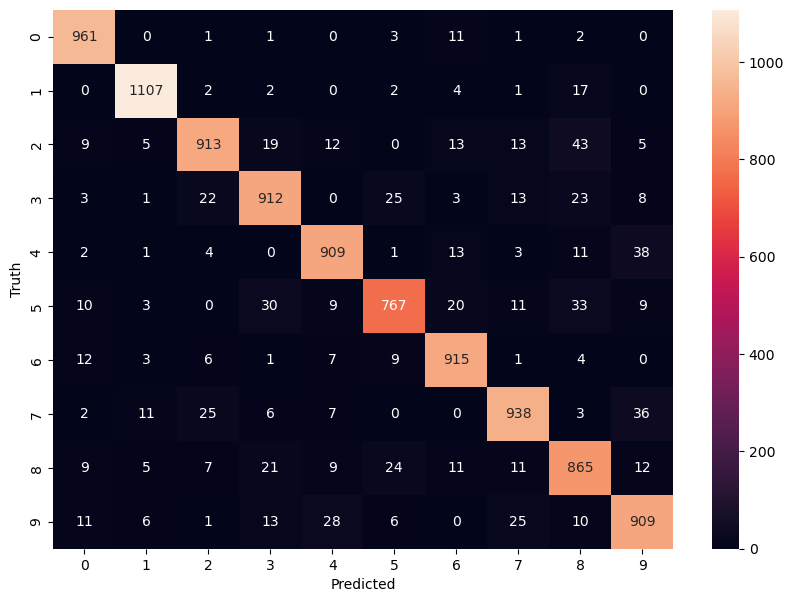

In [18]:
#Confusion Matrix
cm= tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
#Adding Hidden Layer to the model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid')
    #Dense- each neuron is connected to every other neuron in other layer
]
)

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_flat_scaled_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2758 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1220 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0870 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0650 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0502 - accuracy: 0.9844


313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

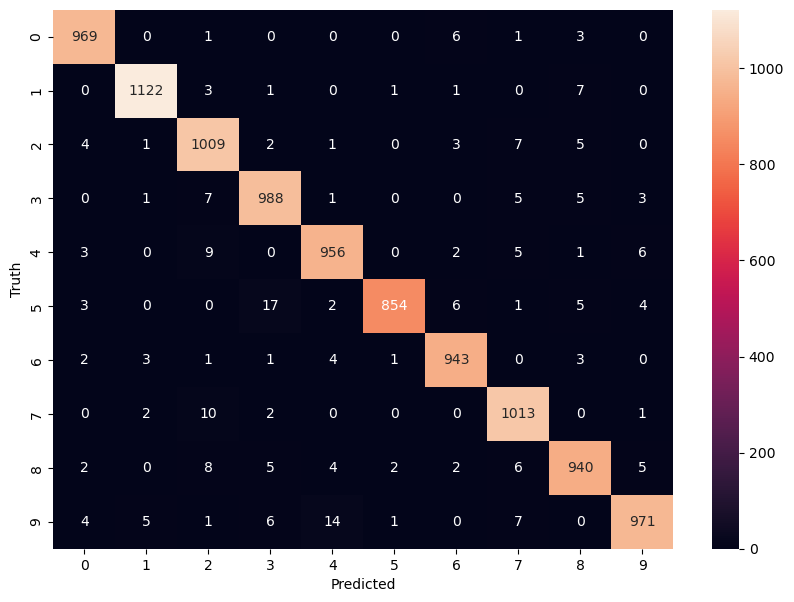

In [21]:
y_predicted = model.predict(X_flat_scaled_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]

cm= tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')